<a href="https://colab.research.google.com/github/gongboogi/SchoolWork/blob/main/HonGong-mldl/hg_mldl_chapter04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**hg_mldl chapter 04-2**


## 확률적 경사 하강법
매주 새로운 무작위의 데이터를 훈련하려면?

-> 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련한다.
= 점진적학습


**확률적 경사 하강법**: 대표적인 점진적 학습 알고리즘. 훈련세트에서 랜덤하게 하나의 샘플을 고른다.

**에포크**: 훈련세트를 한 번 모두 사용하는 과정. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.

**손실함수(비용함수)**: 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준. 값이 작을수록 좋다!



---



###**SGDclassifier**

In [35]:
import pandas as pd  # fish_csv_data 파일에서 판다스 데이터프레임을 만듦
fish = pd.read_csv('https://bit.ly/fish_csv')

In [36]:
print(fish)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [37]:
# Species열을 제외한 나머지 5개는 입력데이터, Species열은 타킷 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() #2개 이상의 값은 []로 묶는다.
fish_target = fish['Species'].to_numpy()

In [38]:
# 훈련세트와 테스트 세트로 나눈다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [39]:
#표준화 전처리. 꼭 훈련세트에서 학습한 통계 값으로 테스트 세트를 변환하도록 한다!
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) #훈련세트로 학습
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [40]:
from sklearn.linear_model import SGDClassifier #사이킷런에서 확률적 경사 하강법을 제공하는 대표적 분류용 클래스

In [41]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) #loss='log'로 손실함수 지정, max_iter로  수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


<br>

확률적 경사 하강법은 점진적 학습이 가능하다. 

모델을 이어서 훈련하려면 **partial_fit()** 메서드 사용


In [42]:
sc.partial_fit(train_scaled, train_target) # partial_fit() 메서드는 호출할 때마다 1에포크씩 이어서 훈련할 수 있다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,  test_target))

0.8151260504201681
0.85


##에포크와 과대/과소적합

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.


* 에포크 횟수가 적으면? -> 모델이 훈련세트를 덜 학습한다.과소적합 모델 가능성이 높다.
* 에포크 횟수가 충분히 많으면? -> 훈련 세트를 환전히 학습한다. 과대적합 모델 가능성이 높다.

In [43]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score =[] # 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트 준비
test_score = []
classes = np.unique(train_target)

In [44]:
# 300번의 에포크 동안 훈련
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes) #훈련
  train_score.append(sc.score(train_scaled, train_target)) #훈련 세트 리스트에 점수 추가
  test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 라스트에 점수 추가

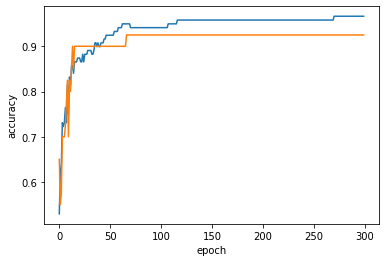

In [45]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수 그래프
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

-> 100번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어진다. 이 모델의 경우 100번째 에포크가 적절한 반복 횟수로 보인다!

In [54]:
# SGDClassifier의 반복횟수를 100에 맞추고 훈련
# SGDClassifier에서는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
# tol: 성능이 향상될 최솟값
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
